# Chemical encoding examples

## Example 1
Example of how to encode a chemical compound as input for a neural network.
* The chemical structure is in SMILES format.
* Use rdkit to calculate the fingerprint and map into a binary vector.

In [154]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
from IPython.display import SVG
import pandas as pd

In [155]:
import csv
chems = []
with open('data/solubility/delaney.csv') as f:
    cv = csv.DictReader(f)
    for row in cv:
        chems.append( Chem.MolFromSmiles( row['SMILES'] ) )

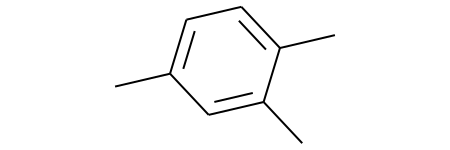

In [156]:
chems[18]

In [157]:
minPath = 1
maxPath = 5
fpSize = 1024
fp = AllChem.RDKFingerprint(chems[18], minPath=1, maxPath=maxPath, fpSize=fpSize)
px = [int(x) for x in list(fp.ToBitString())]
px[0:20]

[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

We use **synbioTools** to map the chemical into a tensor of shape fingerprintSize $\times$ depth. The resulting matrix can be visualized using matplotlib.

In [158]:
from synbioTools import tensorChem
depth = 12
fpSize = 20
tc = tensorChem( chems, 20, 4)
tc[0]

array([[ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  1.],
       [ 0.,  0.,  1.,  1.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.],
       [ 1.,  0.,  1.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  1.,  0.,  0.]])

Text(0,0.5,'fingerprint')

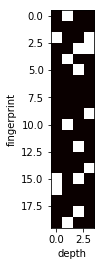

In [159]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(tc[0,:,:])
plt.set_cmap('hot')
plt.xlabel('depth')
plt.ylabel('fingerprint')

## Example 2
Example of encoding an amino-acid sequence into a tensor. We use one-hot encoding for the amino acid and select desired depth for incuding neighboring positions.

In [160]:
from Bio import SeqIO
record = list( SeqIO.parse("data/thermostability/l.txt", "fasta") )
seqs = [str(record[i].seq) for i in range(0, len(record)) ]
seqs[0]

'MRIKNSGILLLAAILLFSCDKKRVFDEYKSVGSAWHKDSVVTFDLPVLDSTKKYNLFVNLRDNNNYPFNNLFLIVAIETPSGFTKVDTLEYQMANPDGTLMGNGFTDIKESKLYYKEDVKFKGKYKVHIKQAVRESGKIPGVEALEGITDVGFRIEQKD'

In [161]:
from synbioTools import tensorSeq
MAX_SEQ_LENGTH = 10
DEPTH = 5
ts, tss = tensorSeq(seqs, MAX_SEQ_LENGTH, DEPTH)

Text(0,0.5,'position')

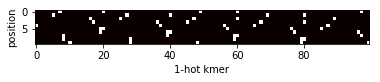

In [162]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(ts[2])
plt.set_cmap('hot')
plt.xlabel('1-hot kmer')
plt.ylabel('position')

In [163]:
 np.array( aaindex( seqs[0][0:(MAX_SEQ_LENGTH+DEPTH)])

SyntaxError: unexpected EOF while parsing (<ipython-input-163-8788d97c9cbe>, line 1)

1-hot encoding for the first amino acids of sequence 0

In [164]:
pd.DataFrame( 
    np.vstack( [np.arange(0,MAX_SEQ_LENGTH+DEPTH),
                np.array( aaindex( seqs[0][0:(MAX_SEQ_LENGTH+DEPTH)]) )]
        ), index = ['pos','seq']
)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
pos,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
seq,10,14,7,8,11,15,5,7,9,9,9,0,0,7,9


The sequence window is reversed so that any zero-padding appears at the beginning of the sequence. In the following example we print the sliding window of depth 5 for positions 9,8,7,6:

In [165]:
ix = np.arange(0,DEPTH*20, 20)
for a in range(0,4):
    print( np.where(ts[0,a] == 1) - ix )

[[9 9 0 0 7]]
[[9 9 9 0 0]]
[[7 9 9 9 0]]
[[5 7 9 9 9]]
